# Alexander Hillberry
# DSC 320  Math for Data Science
# 3.2 Exercise

# US Population Growth

# A)

In [25]:
import pandas as pd

# Load the data
us_pop_data = pd.read_csv("D:/OneDrive - Bellevue University/DSC 320/week3data/us_pop_data.csv")

# Create a column for the number of years since 1790
us_pop_data['years_since_1790'] = us_pop_data['year'] - 1790

# Create a column for population in millions
us_pop_data['population_in_millions'] = us_pop_data['us_pop'] / (10 ** 6)

styled_table = us_pop_data.style.set_table_styles([{'selector': 'table', 'props': [('border', '2px solid purple')]}])

styled_table


,year,us_pop,years_since_1790,population_in_millions
0,1790,3929326,0,3.929326
1,1800,5308483,10,5.308483
2,1810,7239881,20,7.239881
3,1820,9638453,30,9.638453
4,1830,12866020,40,12.866020
5,1840,17069453,50,17.069453
6,1850,23191876,60,23.191876
7,1860,31443321,70,31.443321
8,1870,39818449,80,39.818449
9,1880,50189209,90,50.189209


# B)

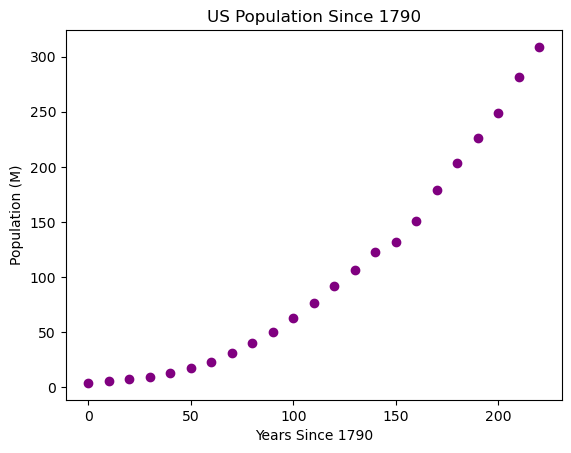

In [26]:
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(us_pop_data['years_since_1790'], us_pop_data['population_in_millions'], color='purple')
plt.title('US Population Since 1790')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (M)')
plt.show()


# C)

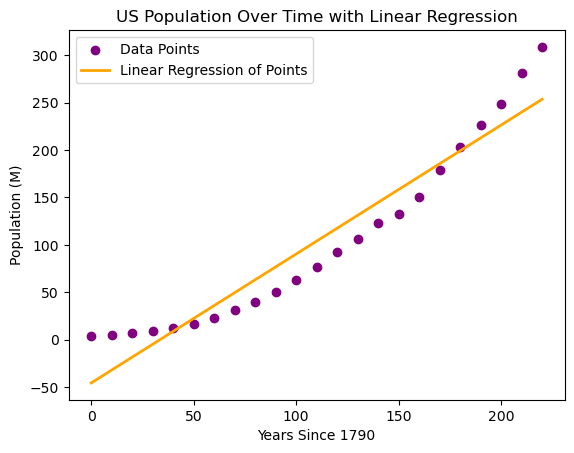

R2 = 0.9192437447080442


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = us_pop_data[['years_since_1790']]
y = us_pop_data['population_in_millions']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data and regression line optionally, to visualize more clearly
plt.scatter(us_pop_data['years_since_1790'], us_pop_data['population_in_millions'], color='purple', label='Data Points')
plt.plot(us_pop_data['years_since_1790'], y_pred, color='orange', linewidth=2, label='Linear Regression of Points')
plt.title('US Population Over Time with Linear Regression')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (M)')
plt.legend()
plt.show()

# Prediction method
y_pred = model.predict(X)

# Calculate R2 value
r2_value = r2_score(y, y_pred)
print(f'R2 = {r2_value}')


# D)

In [41]:
# Create column for the square of the number of years since 1790
us_pop_data['years_since_1790_squared'] = np.square(us_pop_data['years_since_1790'])
# Display the new column with the existing table
styled_table = us_pop_data.style.set_table_styles([{'selector': 'table', 'props': [('border', '2px solid purple')]}])

styled_table

,year,us_pop,years_since_1790,population_in_millions,years_since_1790_squared
0,1790,3929326,0,3.929326,0
1,1800,5308483,10,5.308483,100
2,1810,7239881,20,7.239881,400
3,1820,9638453,30,9.638453,900
4,1830,12866020,40,12.866020,1600
5,1840,17069453,50,17.069453,2500
6,1850,23191876,60,23.191876,3600
7,1860,31443321,70,31.443321,4900
8,1870,39818449,80,39.818449,6400
9,1880,50189209,90,50.189209,8100


# E)

R2 Value (Squared Feature Model): 0.9984915694986646


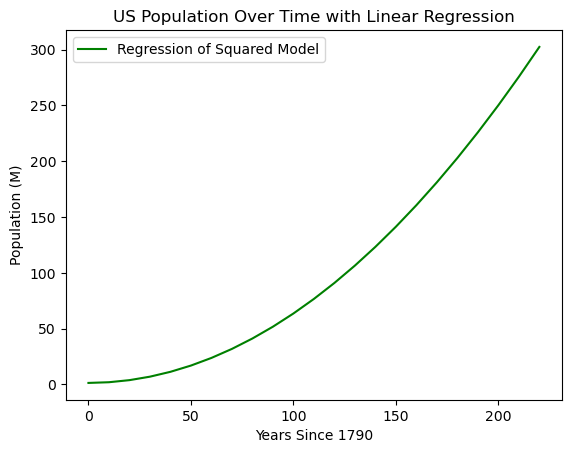

In [50]:
# Prepare the data for the squared feature
X_squared = us_pop_data[['years_since_1790_squared']]

# Create a linear regression model with the squared feature
model_squared = LinearRegression()
model_squared.fit(X_squared, y)

# Make predictions
y_pred_squared = model_squared.predict(X_squared)

# Calculate R2 value for the squared feature model
r2_value_squared = r2_score(y, y_pred_squared)
print(f'R2 Value (Squared Feature Model): {r2_value_squared}')

# Optionally plot the squared model
plt.plot(us_pop_data['years_since_1790'], y_pred_squared, label='Regression of Squared Model', color='green')

plt.title('US Population Over Time with Linear Regression')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (M)')
plt.legend()
plt.show()



# F)

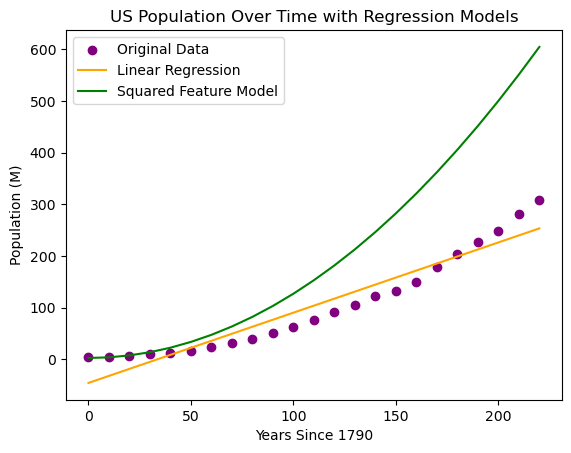

In [61]:
# Scatter plot of original data
plt.scatter(us_pop_data['years_since_1790'], us_pop_data['population_in_millions'], label='Original Data', color='purple')

# Linear regression model
plt.plot(us_pop_data['years_since_1790'], y_pred, label='Linear Regression', color='orange')

# Squared feature model with adjusted scale for better visibility
plt.plot(us_pop_data['years_since_1790'], y_pred_squared * 2, label='Squared Feature Model', color='green')

plt.title('US Population Over Time with Regression Models')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (M)')
plt.legend()
plt.show()



# Customer Spending Data

# A)

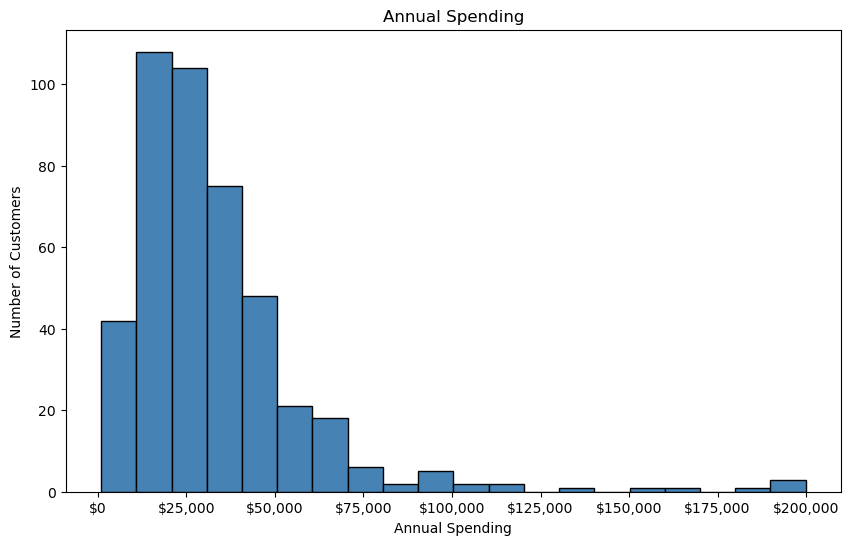

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the customer spending data
customer_spending_data = pd.read_csv("D:/OneDrive - Bellevue University/DSC 320/week3data/customer_spending.csv")

# Plot a histogram of customer spending amounts
plt.figure(figsize=(10, 6))
plt.hist(customer_spending_data['ann_spending'], bins=20, edgecolor='black', color='steelblue')
plt.title('Annual Spending')
plt.xlabel('Annual Spending')
plt.ylabel('Number of Customers')

# Format x-axis ticks as dollars
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.show()



# B)

In [85]:
import pandas as pd
import numpy as np

# Load the customer spending data
customer_spending_data = pd.read_csv("D:/OneDrive - Bellevue University/DSC 320/week3data/customer_spending.csv")

# Create a new column with log-transformed annual spending
customer_spending_data['log_ann_spending'] = np.log1p(customer_spending_data['ann_spending'])

# Display the DataFrame with the new column
print(customer_spending_data[['ann_spending', 'log_ann_spending']].head(20))


    ann_spending  log_ann_spending
0          34112         10.437434
1          33266         10.412321
2          36610         10.508104
3          27381         10.217641
4          46100         10.738590
5          26710         10.192831
6          26465         10.183616
7          29517         10.292756
8          18694          9.836011
9          46662         10.750707
10         33864         10.430137
11         21259          9.964583
12         62889         11.049142
13         52811         10.874494
14         53729         10.891727
15         16961          9.738731
16         27679         10.228465
17         20653          9.935664
18         43180         10.673156
19         23427         10.061687


# C)

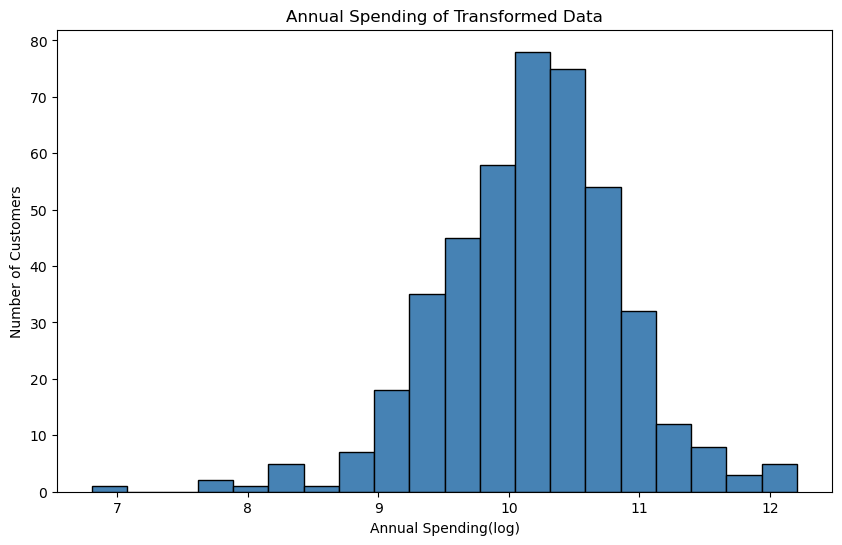

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the customer spending data
customer_spending_data = pd.read_csv("D:/OneDrive - Bellevue University/DSC 320/week3data/customer_spending.csv")

# Create a new column with log-transformed annual spending
customer_spending_data['log_ann_spending'] = np.log1p(customer_spending_data['ann_spending'])

# Plot a histogram of transformed annual spending
plt.figure(figsize=(10, 6))
plt.hist(customer_spending_data['log_ann_spending'], bins=20, edgecolor='black', color='steelblue')
plt.title('Annual Spending of Transformed Data')
plt.xlabel('Annual Spending(log)')
plt.ylabel('Number of Customers')
plt.show()


# D)

When comparing the two histograms, it is apparent the first is left-skewed and the latter appears more normally distributed. It can be assumed that if we were wanting to address questions surrounding spending then it would most likely be important to know whether there were outliers. Depending on how we view our histogram, we could come to different conclusions. It can be more challenging to differentiate other factors from the left-skewed distribution because of the outlier noise, vs being able to see smaller changes more clearly in the second histogram of transformed data. 
Additionally, it is helpful to use the second histogram because of its ability to greater explain linear relationships in the data. By reducing the impact of outliers, we can more effectively measure the what is happening in the actual ‘middle’ of the data.
